<font color = "#CC3D3D"><br>
# Using a simple convnet to dramatically improve the accuracy #

##### Set Up

In [1]:
#
# Setting for obtaining reproducible results
#

import numpy as np
import tensorflow as tf
import random as rn

# The below is necessary in Python 3.2.3 onwards to
# have reproducible behavior for certain hash-based operations.
# See these references for further details:
# https://docs.python.org/3.4/using/cmdline.html#envvar-PYTHONHASHSEED
# https://github.com/keras-team/keras/issues/2280#issuecomment-306959926

import os
os.environ['PYTHONHASHSEED'] = '0'

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.

np.random.seed(42)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.

rn.seed(12345)

# Force TensorFlow to use single thread.
# Multiple threads are a potential source of
# non-reproducible results.

session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, 
                              inter_op_parallelism_threads=1)

from keras import backend as K

# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, 
# see: https://www.tensorflow.org/api_docs/python/tf/set_random_seed

tf.set_random_seed(1234)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


In [3]:
import keras, sklearn
import matplotlib.pyplot as plt
from IPython.display import Image
from keras.utils.vis_utils import model_to_dot

from keras.datasets import mnist
from keras.models import Sequential
from keras import layers
from keras import optimizers
from keras import regularizers
from keras.utils import np_utils

### Step 1: Load and Process the Data ###

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# X_train is 60000 rows of 28x28 values -> reshaped in 60000 x 28 x 28
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

60000 train samples
10000 test samples


### Step 2: Define the CNN Model & its Architecture ###

In [5]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

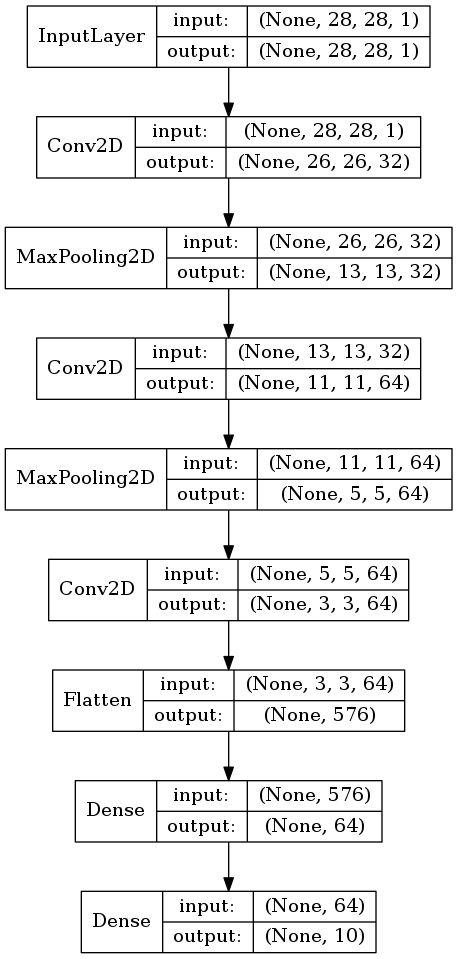

In [45]:
Image(model_to_dot(model,show_shapes=True, show_layer_names=False).create(prog='dot', format='png'))

### Step 3: Choose the Optimizer and the Cost function

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Step 4: Train the CNN Model

In [1]:
%%time

history = model.fit(X_train, Y_train, 
                    batch_size=64, epochs=5, 
                    verbose=1, validation_split=0.2)

plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.title("Loss")
plt.show()

NameError: name 'model' is not defined

### Step 5: Evaluate the CNN Model performance

In [48]:
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 77us/step
Test score: 0.02588975036218253
Test accuracy: 0.9921


## Exercise
위 CNN 모델의 성능을 개선하시오.

## End